In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)


In [8]:
# load the dataset
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [10]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

C:\Users\samee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 5s - 53ms/step - loss: 0.0223
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0097
Epoch 3/100
94/94 - 0s - 5ms/step - loss: 0.0079
Epoch 4/100
94/94 - 1s - 7ms/step - loss: 0.0070
Epoch 5/100
94/94 - 1s - 7ms/step - loss: 0.0062
Epoch 6/100
94/94 - 1s - 8ms/step - loss: 0.0055
Epoch 7/100
94/94 - 1s - 8ms/step - loss: 0.0048
Epoch 8/100
94/94 - 1s - 5ms/step - loss: 0.0041
Epoch 9/100
94/94 - 1s - 6ms/step - loss: 0.0036
Epoch 10/100
94/94 - 1s - 10ms/step - loss: 0.0031
Epoch 11/100
94/94 - 1s - 9ms/step - loss: 0.0028
Epoch 12/100
94/94 - 1s - 6ms/step - loss: 0.0025
Epoch 13/100
94/94 - 1s - 12ms/step - loss: 0.0024
Epoch 14/100
94/94 - 1s - 7ms/step - loss: 0.0022
Epoch 15/100
94/94 - 0s - 4ms/step - loss: 0.0022
Epoch 16/100
94/94 - 1s - 10ms/step - loss: 0.0021
Epoch 17/100
94/94 - 1s - 8ms/step - loss: 0.0021
Epoch 18/100
94/94 - 1s - 6ms/step - loss: 0.0021
Epoch 19/100
94/94 - 0s - 5ms/step - loss: 0.0021
Epoch 20/100
94/94 - 1s - 10ms/step - loss: 0.0021
Epoc

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 22.80 RMSE
Test Score: 49.26 RMSE


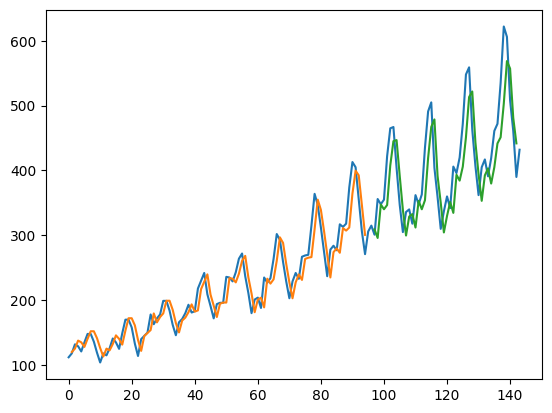

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

C:\Users\samee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 5s - 52ms/step - loss: 0.0419
Epoch 2/100
94/94 - 1s - 13ms/step - loss: 0.0196
Epoch 3/100
94/94 - 0s - 4ms/step - loss: 0.0151
Epoch 4/100
94/94 - 0s - 4ms/step - loss: 0.0137
Epoch 5/100
94/94 - 1s - 7ms/step - loss: 0.0126
Epoch 6/100
94/94 - 0s - 4ms/step - loss: 0.0116
Epoch 7/100
94/94 - 1s - 8ms/step - loss: 0.0105
Epoch 8/100
94/94 - 1s - 7ms/step - loss: 0.0093
Epoch 9/100
94/94 - 1s - 8ms/step - loss: 0.0081
Epoch 10/100
94/94 - 1s - 9ms/step - loss: 0.0069
Epoch 11/100
94/94 - 1s - 6ms/step - loss: 0.0057
Epoch 12/100
94/94 - 1s - 9ms/step - loss: 0.0046
Epoch 13/100
94/94 - 1s - 6ms/step - loss: 0.0037
Epoch 14/100
94/94 - 1s - 9ms/step - loss: 0.0030
Epoch 15/100
94/94 - 1s - 9ms/step - loss: 0.0026
Epoch 16/100
94/94 - 1s - 6ms/step - loss: 0.0023
Epoch 17/100
94/94 - 1s - 6ms/step - loss: 0.0022
Epoch 18/100
94/94 - 1s - 9ms/step - loss: 0.0021
Epoch 19/100
94/94 - 1s - 5ms/step - loss: 0.0021
Epoch 20/100
94/94 - 1s - 9ms/step - loss: 0.0021
Epoch 2

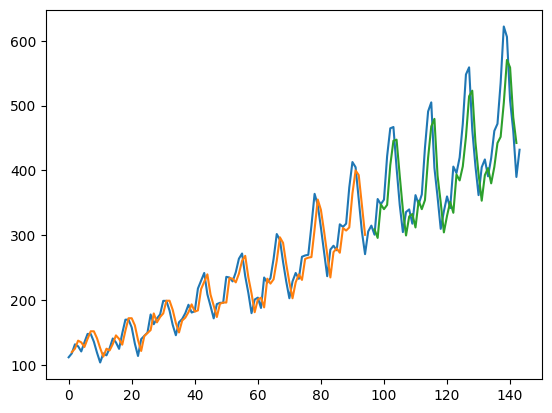

In [19]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()